In [198]:
from pyforest import *

In [199]:
df  = pd.read_csv('data/total load station cleaned.csv')

In [200]:
df.head()

,Unnamed: 0,Hour,Day,Month,Load,Pressure,Relative Humidity,Temperature,BF12,BF7,F8B
0,0,1,1,1,39.7,981.25,42.90,24.485,0.23,3.6,0.97
1,1,2,1,1,38.8,981.05,45.25,24.120,0.24,3.6,0.93
2,2,3,1,1,38.1,980.70,50.90,22.620,0.23,3.5,0.90
3,3,4,1,1,37.7,980.60,55.30,21.435,0.22,3.3,0.85
4,4,5,1,1,38.9,980.95,60.15,20.510,0.22,3.3,0.83


In [201]:
df.shape

(8760, 11)

In [202]:
# may_data = df[df['Month'] == 5].drop('Temperature', axis=1)
# df.dropna(axis=0, inplace=True, subset=['Temperature'])

In [203]:
df.shape

(8760, 11)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
Unnamed: 0           8760 non-null int64
Hour                 8760 non-null int64
Day                  8760 non-null int64
Month                8760 non-null int64
Load                 8759 non-null object
Pressure             7765 non-null float64
Relative Humidity    7765 non-null float64
Temperature          4280 non-null float64
BF12                 5726 non-null float64
BF7                  5690 non-null float64
F8B                  5676 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [205]:
df['BF12'] = df['BF12'].astype(float)

In [206]:
df['BF7'] = df['BF7'].astype(float)

In [207]:
df['F8B'] = df['F8B'].astype(float)

In [208]:
df['F8B'] = df['F8B'].astype(float)

In [209]:
df['power'] = df['BF12'] + df['BF7'] + df['F8B']

In [210]:
df.head()

,Unnamed: 0,Hour,Day,Month,Load,Pressure,Relative Humidity,Temperature,BF12,BF7,F8B,power
0,0,1,1,1,39.7,981.25,42.90,24.485,0.23,3.6,0.97,4.80
1,1,2,1,1,38.8,981.05,45.25,24.120,0.24,3.6,0.93,4.77
2,2,3,1,1,38.1,980.70,50.90,22.620,0.23,3.5,0.90,4.63
3,3,4,1,1,37.7,980.60,55.30,21.435,0.22,3.3,0.85,4.37
4,4,5,1,1,38.9,980.95,60.15,20.510,0.22,3.3,0.83,4.35


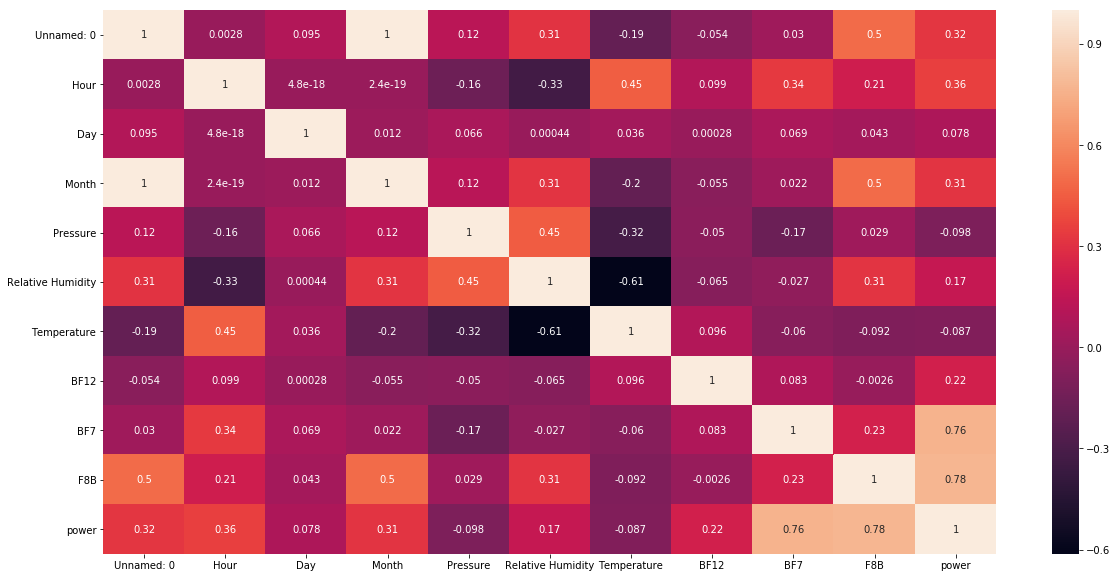

In [211]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [212]:
df.shape

(8760, 12)

In [213]:
from sklearn.model_selection import train_test_split

In [250]:
# df.dropna(axis=0, inplace=True)
new_data = df[['Day', 'Hour', 'Month', 'Pressure', 'Relative Humidity', 'Temperature', 'power']]

In [251]:
# features = df.drop(['BF12','F8B', 'BF7','Load', 'power','Unnamed: 0', 'Pressure'], axis=1)
new_data.shape

(8760, 7)

In [252]:
new_data.dropna(axis=0, inplace=True)

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
new_data.shape

(1959, 7)

In [254]:
features = new_data[['Day','Hour', 'Month','Relative Humidity','Pressure', 'Temperature']]

In [255]:
label = new_data[['power']]

In [256]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 8015
Data columns (total 7 columns):
Day                  1959 non-null int64
Hour                 1959 non-null int64
Month                1959 non-null int64
Pressure             1959 non-null float64
Relative Humidity    1959 non-null float64
Temperature          1959 non-null float64
power                1959 non-null float64
dtypes: float64(4), int64(3)
memory usage: 122.4 KB


In [257]:
features_train, features_test, labels_train, labels_test = train_test_split(features, label, test_size=0.1, random_state=1)

In [258]:
# from sklearn.preprocessing import MinMaxScaler

In [259]:
# scaler = MinMaxScaler()
# features_train = scaler.fit_transform(features_train)

In [260]:
# features_test = scaler.fit_transform(features_test)

In [261]:
# labels_train = scaler.fit_transform(labels_train)
# labels_test = scaler.fit_transform(labels_test)

In [262]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost
from sklearn.tree import DecisionTreeRegressor

In [265]:
model = RandomForestRegressor(max_depth=None, n_estimators=200)

In [266]:
# model = RandomForestRegressor()
# model = GradientBoostingRegressor()
# model = AdaBoostRegressor(
#     DecisionTreeRegressor(max_depth=2), n_estimators=200, learning_rate=0.5
# )
xgb = xgboost.XGBRegressor()

In [267]:
model.fit(features_train, labels_train)

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [268]:
# xgb_reg = xgboost.XGBRegressor(max_depth=1, n_estimators=2000,learning_rate=0.5)

In [269]:
xgb.fit(features_train, labels_train)

[17:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [270]:
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error

In [271]:
np.sqrt(mean_squared_error(labels_test, model.predict(features_test)))

0.4801127951017427

In [276]:
features_test.head()

,Day,Hour,Month,Relative Humidity,Pressure,Temperature
2464,13,17,4,69.50,980.55,29.615
7644,15,13,11,83.30,979.00,29.015
2500,15,5,4,93.55,978.15,21.720
2240,4,9,4,91.10,978.90,26.220
7735,19,8,11,98.45,980.40,23.760


In [277]:
labels_test.head()

,power
2464,5.50
7644,7.26
2500,5.64
2240,4.37
7735,5.49


In [278]:
model.predict([features_test.loc[2464]])

array([5.4189])

In [265]:
label.max()

power    11.0
dtype: float64

In [253]:
labels_test.shape

(145, 1)

In [272]:
model.score(features_test, labels_test)

0.9160725340251943

In [275]:
from joblib import dump
dump(model, 'real-models-hourly/rf' + str(round(model.score(features_test, labels_test),4)) + '.joblib')

['real-models-hourly/rf0.9161.joblib']